### Intro

#### **5 examples of the application of ML methods in life and the benefit of using ML methods in each example**

<div style="font-size: 14px; width: 100%; text-align: left;">

| **Application Area** | **Description** | **Benefit** |
|----------------------|-----------------|-------------|
| **Healthcare: Disease Diagnosis** | Machine Learning methods analyze medical images to detect diseases like cancer, diabetic retinopathy, or lung conditions. Predictive models assist in patient diagnosis by analyzing patient data and identifying patterns that indicate illness. | Faster and more accurate diagnoses, reduced human error, and improved early detection of diseases, ultimately saving lives. |
| **Finance: Fraud Detection** | Banks and payment processors use ML models to identify fraudulent transactions in real-time by analyzing transaction patterns, locations, and user behavior. | Increased security for financial transactions, early detection of fraud, and minimized financial losses for both institutions and consumers. |
| **Transportation: Autonomous Driving** | Self-driving cars use ML models to process input from sensors, cameras, and radar to navigate, detect obstacles, and make driving decisions. | Safer and more efficient transportation, reduced human error in driving, and potential reductions in traffic congestion. |
| **Retail: Personalized Recommendations** | E-commerce platforms like Amazon or Netflix use ML algorithms to recommend products, movies, or content based on user preferences and browsing history. | Enhanced customer experience through personalized content, increased customer engagement, and higher sales for businesses. |
| **Customer Service: Chatbots and Virtual Assistants** | Virtual assistants like Siri, Alexa, and chatbots on websites use natural language processing (NLP) to understand and respond to user queries. | 24/7 customer support, faster response times, and reduced operational costs for businesses. | 

<br>
</div>

#### **Classification of the 5 Examples**

<div style="font-size: 14px; width: 100%;, text-align: left;">

| **Application Area** | **Class** | **Reason** |
|----------------------|-----------|-------------|
| **Healthcare: Disease Diagnosis** | Supervised Learning | This is a classification problem where the model is trained to predict the presence or absence of diseases based on medical image data (X-rays, MRIs). |
| **Finance: Fraud Detection** | Supervised and Unsupervised Learning | **Supervised:** When labeled data (fraud or non-fraud) is available, it's a classification problem. **Unsupervised:** Identifies unusual patterns. |
| **Transportation: Autonomous Vehicles** | Reinforcement Learning | This is a decision-making problem where the car learns to navigate and interact with the environment using rewards and penalties (e.g., avoiding collisions). |
| **Retail: Personalized Recommendations** | Unsupervised Learning | Typically a collaborative filtering task where the system recommends products based on user behavior without explicit labels, often using clustering. |
| **Customer Service: Chatbots and Virtual Assistants** | Supervised and Reinforcement Learning | **Supervised:** Trained on labeled data (queries and correct responses). **Reinforcement:** Improves over time through feedback (reward-based learning). |

<br>
</div>

<h4><b>Difference Between Multiclass and Multilabel Classification</b></h4>

<div style="font-size: 14px; width=100%; text-align: justify">

| **Type** | **Description** | **Real-World Example** |
|----------|-----------------|-------------------------|
| **Multiclass Classification** | Each instance belongs to one and only one class from a set of multiple classes. | Classifying a fruit (apple, banana, orange). Each fruit belongs to only one category. Used in image classification (e.g., animal recognition) and handwriting recognition (e.g., digit classification). |
| **Multilabel Classification** | Each instance can belong to multiple classes simultaneously. | Classifying a movie into multiple genres (Action, Comedy, Drama). Used in text classification (e.g., a document can belong to multiple topics) and music genre classification (e.g., a song can be both "pop" and "rock"). |

  **Key Differences**
| **Feature** | **Multiclass** | **Multilabel** |
|-------------|----------------|----------------|
| **Number of Labels** | One label per instance | Multiple labels per instance |
| **Classes** | Each instance belongs to one class | Each instance can belong to multiple classes |
| **Example** | Image classification (dog, cat) | Genre classification (action, comedy) |
| **Type of Problem** | Single-label, mutually exclusive classes | Multi-label, non-mutually exclusive classes |

<br>
</div>

#### **Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?**

<div style="font-size: 14px; width=100%; text-align: justify">

Predicting house prices typically represents **regression problem** because the target variable (house price) is continuous.<br>
However, it is possible to reduce the regression problem to a classification problem by discretizing the continuous target variable into categories:<br>

Grouping house prices into bins, such as:
- Class 1: Houses priced below $100,000
- Class 2: Houses priced between $100,000 and $300,000
- Class 3: Houses priced above $300,000

In this scenario, the problem becomes a classification task where the model predicts categories rather than specific prices.

</div>

### Data Analysis

In [501]:
import pandas as pd
import numpy as np
import sklearn as scikit
import lightgbm
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns

In [502]:
data_json = pd.read_json('./datasets/train.json')

In [503]:
data_json.shape

(49352, 15)

In [504]:
print(data_json.columns.tolist())

['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level']


'Price' is the target column

In [505]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [506]:
data_json.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [507]:
numeric_data = data_json.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [508]:
columns = ['bathrooms', 'bedrooms', 'interest_level', 'price']
df = data_json[columns].reset_index(drop=True)
df

,bathrooms,bedrooms,interest_level,price
0,1.0,1,medium,2400
1,1.0,2,low,3800
2,1.0,2,medium,3495
3,1.5,3,medium,3000
4,1.0,0,low,2795
...,...,...,...,...
49347,1.0,3,low,2800
49348,1.0,2,medium,2395
49349,1.0,1,medium,1850
49350,1.0,2,medium,4195


### Statistical Data Analysis

#### Basic Definitions of Statistics

<div style="font-size:14px;">

1. The **mean** is the average of a set of numbers. It is calculated by adding all the values together and dividing by the total number of values.

2. The **median** is the middle value in a dataset when the values are ordered from least to greatest. If there’s an even number of values, the median is the average of the two middle numbers.

3. The **mode** is the value that appears most frequently in a dataset. A dataset may have no mode, one mode, or multiple modes if there are ties.

4. **Variance** measures how far the data points are from the mean. It gives an idea of how spread out the data is.

5. The **standard deviation** is the square root of the variance and provides a measure of the spread of data points. A high standard deviation indicates that the data points are spread out from the mean, while a low standard deviation means they are closer to the mean.

6. A **discrete uniform distribution** is a probability distribution where each possible outcome has an equal chance of occurring. An example would be the roll of a fair die.

7. The **Bernoulli distribution** models a random experiment with exactly two outcomes (often labeled 1 and 0), like flipping a coin (heads or tails). It’s used to describe binary outcomes.

8. The **binomial distribution** describes the number of successes in a fixed number of independent trials, where each trial has only two possible outcomes. It is used when the Bernoulli experiment is repeated multiple times.

9. The **Poisson distribution** models the number of times an event occurs within a fixed interval of time or space. It's typically used for counting events that happen randomly but with a known constant mean rate, like the number of cars passing a street corner in an hour.

10. The **normal distribution**, also known as the Gaussian distribution, is a symmetric, bell-shaped distribution. It is often used in statistics because many natural phenomena (like height, weight, and IQ) follow this distribution.

11. The **exponential distribution** models the time between events in a Poisson process, where events happen continuously and independently at a constant average rate. It’s commonly used for modeling waiting times or the life span of objects.

12. **Outliers** are values that are significantly higher or lower than the majority of the data points. They can distort statistical analysis, so it's important to identify and handle them carefully.

13. **Percentiles** divide a dataset into 100 equal parts. The nth percentile is the value below which n percent of the data falls. Common percentiles include the 25th, 50th (median), and 75th percentiles, which are often used to summarize data.

14. A **confidence interval** is a range of values that is used to estimate the true value of a population parameter. It is usually expressed with a confidence level (e.g., 95%), which indicates the probability that the interval contains the true parameter.

</div>

#### Target analysis

Histogram

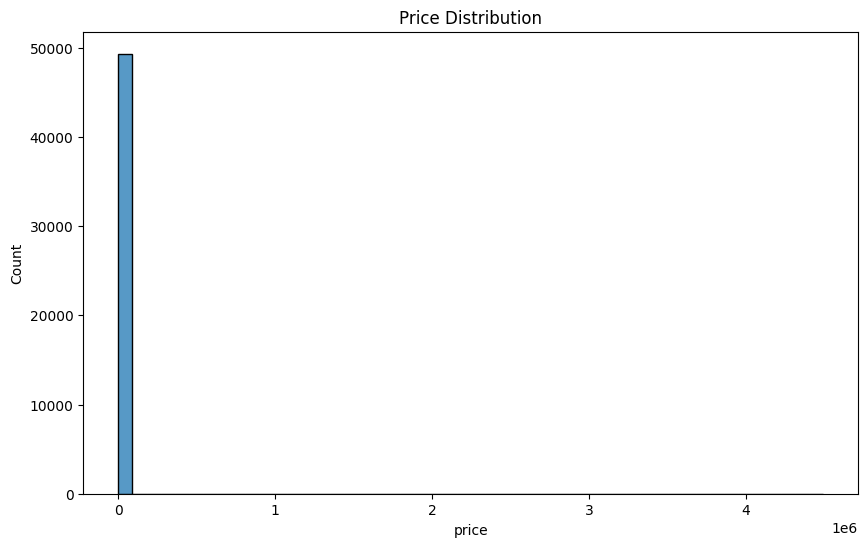

In [509]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=50)
# sns.histplot(data=df, x='price', y=df['price'].value_counts(), bins=70, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Price Distribution')
plt.show()

Boxplot

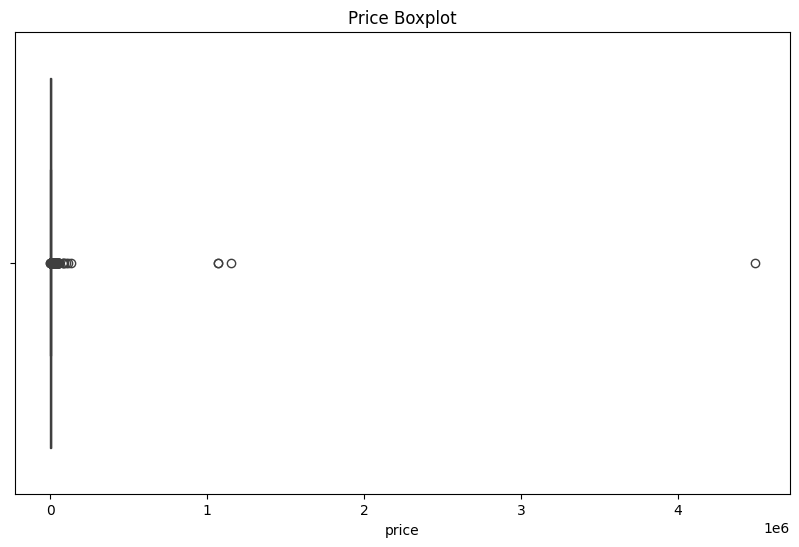

In [510]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price')
plt.title('Price Boxplot')
plt.show()

The price shows a wide distribution with numerous outliers.

In [511]:
# Dropping the rows that are outside the 1 and 99 percentiles
lower_bound = df['price'].quantile(0.01)
upper_bound = df['price'].quantile(0.99)

# df = df.loc[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
# df = df.query('@lower_bound <= price <= @upper_bound')
df = df[df['price'].between(lower_bound, upper_bound)]

# df

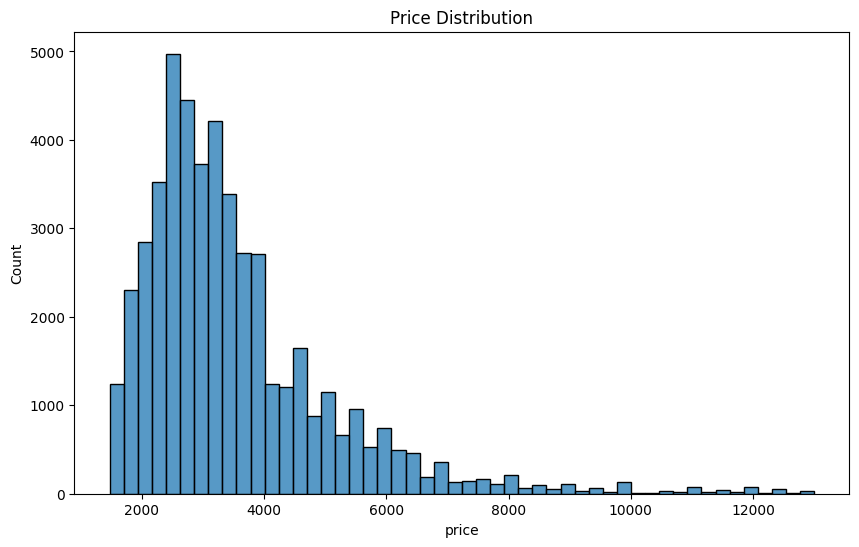

In [512]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=50)
plt.title('Price Distribution')
plt.show()

Dropping the 1 and 99 percentiles removed outliers and made price distribution more concentrated and symmetrical, revealing the core pattern of the data without the influence of extreme values.

#### Characteristics Analysis

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48379 entries, 0 to 49351
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48379 non-null  float64
 1   bedrooms        48379 non-null  int64  
 2   interest_level  48379 non-null  object 
 3   price           48379 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


In [514]:
df['interest_level'].dtype

dtype('O')

The column 'interest_level' has the 'object' type (typically strings in pandas)

In [515]:
df['interest_level']

0        medium
1           low
2        medium
3        medium
4           low
          ...  
49347       low
49348    medium
49349    medium
49350    medium
49351      high
Name: interest_level, Length: 48379, dtype: object

In [516]:
df['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

In [517]:
mapping = {'low' : 0, 'medium' : 1, 'high' : 2}
df.loc[:, 'interest_level'] = df['interest_level'].map(mapping)

In [518]:
df['interest_level'].value_counts()

interest_level
0    33697
1    11116
2     3566
Name: count, dtype: int64

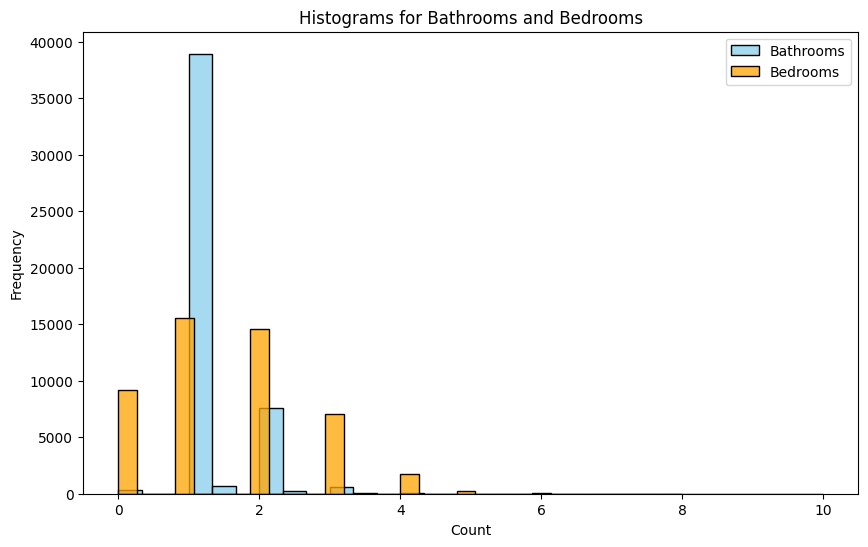

In [519]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['bathrooms'], bins=30, color='skyblue', label='Bathrooms')
sns.histplot(df['bedrooms'], bins=30, color='orange', label='Bedrooms')

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histograms for Bathrooms and Bedrooms')
plt.legend()
plt.show()

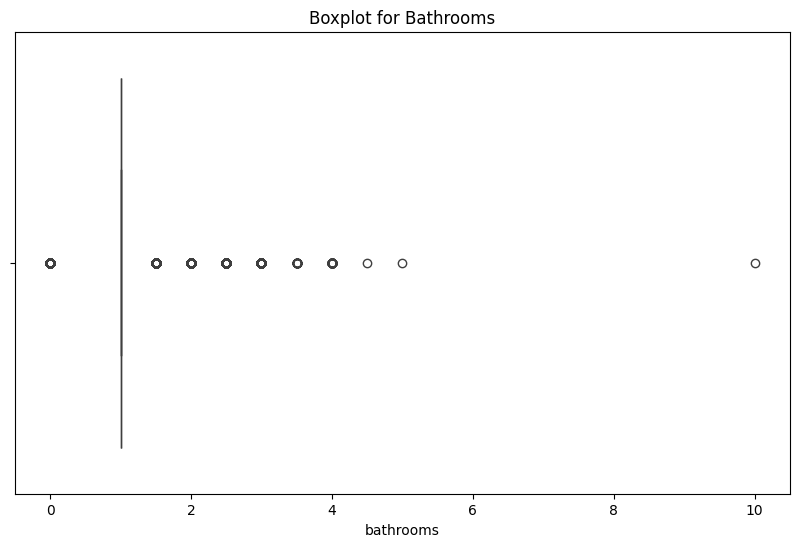

In [520]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot for Bathrooms')
plt.show()

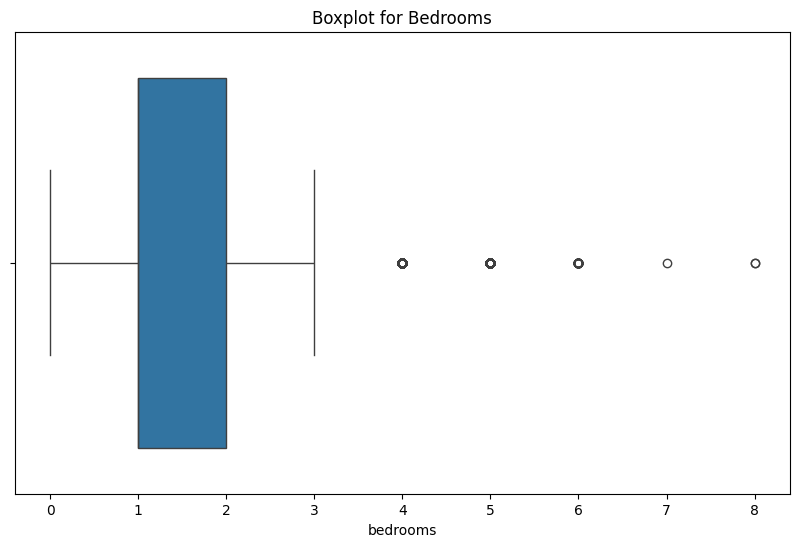

In [521]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot for Bedrooms')
plt.show()

Yes, there are outliers in both boxplots.

Bathrooms Boxplot: Several points are clearly outside the whiskers, indicating extreme values or outliers.

Bedrooms Boxplot: There are also points beyond the whiskers, specifically for values around 4 to 8 bedrooms, which makes them outliers.

#### Complex Analysis

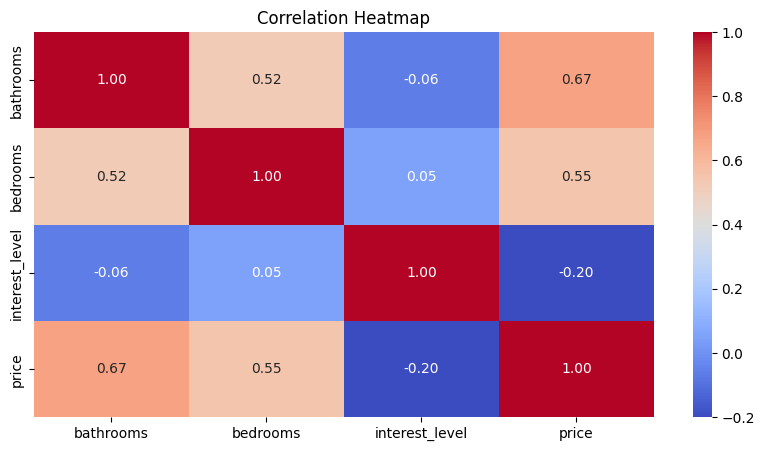

In [522]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Yes, there is a correlation between bathrooms, bedrooms, and price.

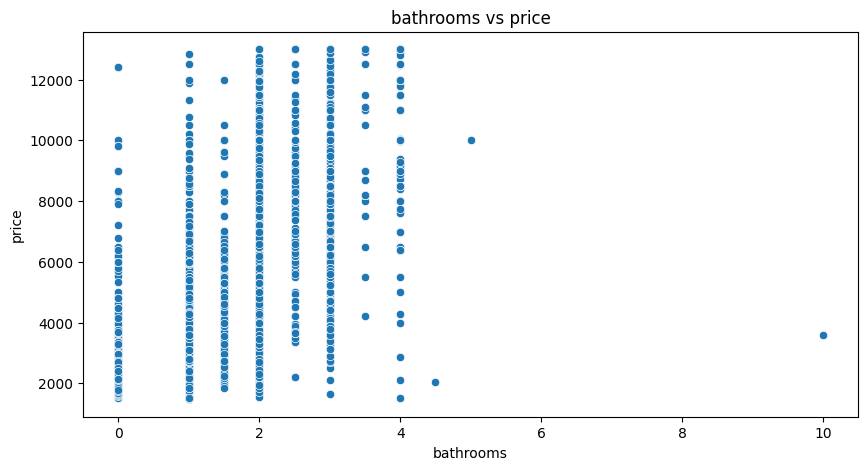

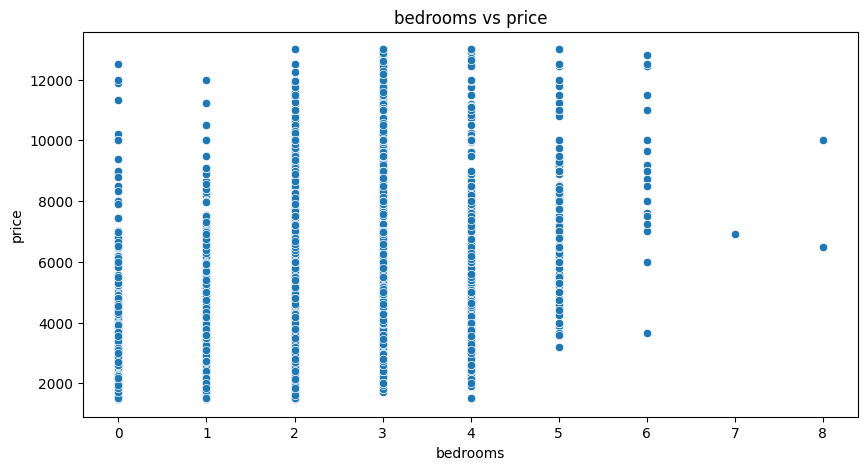

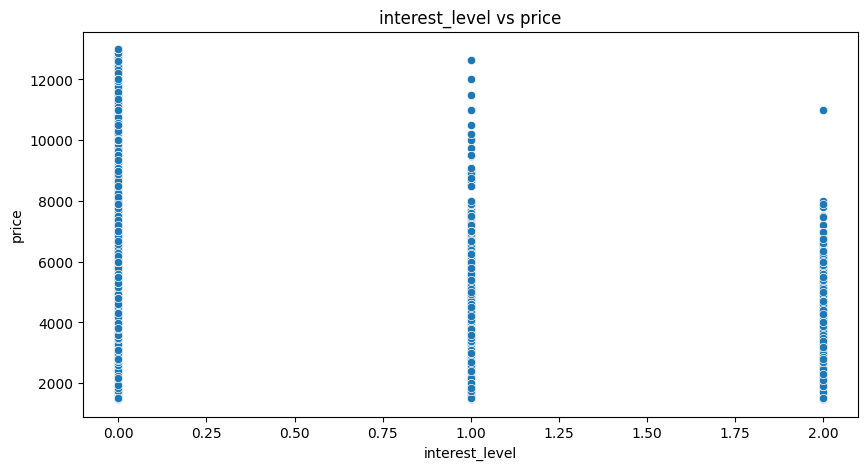

In [523]:
features = ['bathrooms', 'bedrooms', 'interest_level']
target = 'price'

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f"{feature} vs {target}")
    plt.show()

### Creating features

In [524]:
df = df.copy()
df.loc[:, 'bathrooms_squared'] = df['bathrooms'] ** 2
df.loc[:, 'bedrooms_squared'] = df['bedrooms'] ** 2
df.loc[:, 'interest_level_squared'] = df['interest_level'] ** 2

In [525]:
df

,bathrooms,bedrooms,interest_level,price,bathrooms_squared,bedrooms_squared,interest_level_squared
0,1.0,1,1,2400,1.00,1,1
1,1.0,2,0,3800,1.00,4,0
2,1.0,2,1,3495,1.00,4,1
3,1.5,3,1,3000,2.25,9,1
4,1.0,0,0,2795,1.00,0,0
...,...,...,...,...,...,...,...
49347,1.0,3,0,2800,1.00,9,0
49348,1.0,2,1,2395,1.00,4,1
49349,1.0,1,1,1850,1.00,1,1
49350,1.0,2,1,4195,1.00,4,1


In [526]:
squared_features = df[['bathrooms_squared', 'bedrooms_squared', 'interest_level_squared', 'price']]
corr_matrix = squared_features.corr()

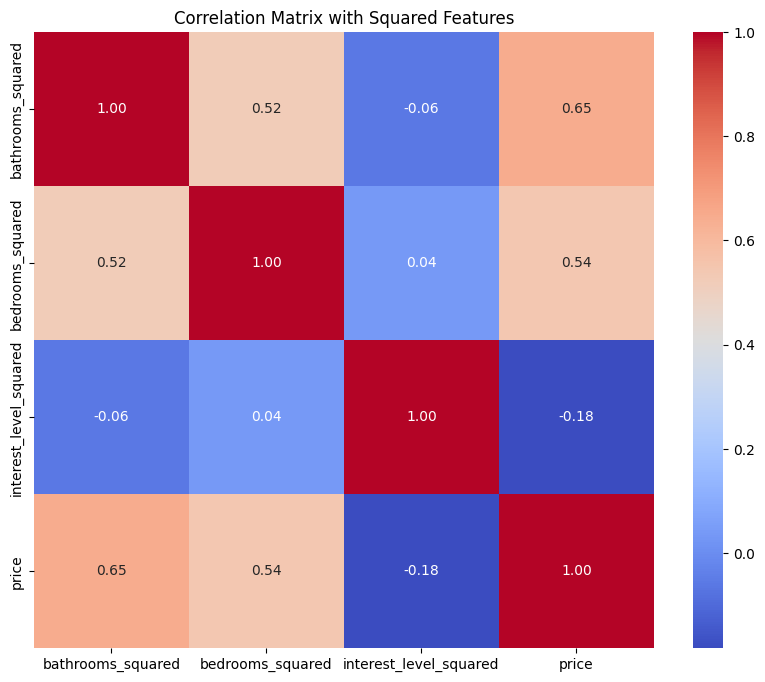

In [527]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Squared Features')
plt.show()

New squared features are more correlated with the target that the basic features.

In [528]:
from sklearn.preprocessing import PolynomialFeatures

df_train = pd.read_json('./datasets/train.json')
df_test = pd.read_json('./datasets/test.json')

# df_train = df_train[(df_train['price'] > lower_bound) & (df_train['price'] < upper_bound)]
# df_test = df_test[(df_test['price'] > lower_bound) & (df_test['price'] < upper_bound)]

X_train = df_train[['bathrooms', 'bedrooms']]
X_test = df_test[['bathrooms', 'bedrooms']]

poly = PolynomialFeatures(degree=10)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

### Training models

In [529]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

#### Results table

In [530]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

#### Linear Regression

In [531]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_poly, df_train['price'])

y_train_pred_lr = linear_reg.predict(X_train_poly)
y_test_pred_lr = linear_reg.predict(X_test_poly)

df_train['linear_reg_train_pred'] = y_train_pred_lr
df_test['linear_reg_test_pred'] = y_test_pred_lr

train_mae_lr = mean_absolute_error(df_train['price'], y_train_pred_lr)
test_mae_lr = mean_absolute_error(df_test['price'], y_test_pred_lr)
train_rmse_lr = root_mean_squared_error(df_train['price'], y_train_pred_lr)
test_rmse_lr = root_mean_squared_error(df_test['price'], y_test_pred_lr)

result_MAE.loc[len(result_MAE)] = ['linear_regression', train_mae_lr, test_mae_lr]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', train_rmse_lr, test_rmse_lr]

#### Decision Tree

In [532]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_poly, df_train['price'])

y_train_pred_tree = decision_tree.predict(X_train_poly)
y_test_pred_tree = decision_tree.predict(X_test_poly)

df_train['decision_tree_train_pred'] = y_train_pred_tree
df_test['decision_tree_test_pred'] = y_test_pred_tree

train_mae_tree = mean_absolute_error(df_train['price'], y_train_pred_tree)
test_mae_tree = mean_absolute_error(df_test['price'], y_test_pred_tree)
train_rmse_tree = root_mean_squared_error(df_train['price'], y_train_pred_tree)
test_rmse_tree = root_mean_squared_error(df_test['price'], y_test_pred_tree)

result_MAE.loc[len(result_MAE)] = ['decision_tree', train_mae_tree, test_mae_tree]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', train_rmse_tree, test_rmse_tree]

#### Native Models

In [533]:
# Mean
mean_train = df_train['price'].mean()
mean_test = df_test['price'].mean()

train_mae_mean = mean_absolute_error(df_train['price'], [mean_train] * len(df_train))
test_mae_mean = mean_absolute_error(df_test['price'], [mean_test] * len(df_test))
train_rmse_mean = root_mean_squared_error(df_train['price'], [mean_train] * len(df_train))
test_rmse_mean = root_mean_squared_error(df_test['price'], [mean_test] * len(df_test))

result_MAE.loc[len(result_MAE)] = ['native_mean', train_mae_mean, test_mae_mean]
result_RMSE.loc[len(result_RMSE)] = ['native_mean', train_rmse_mean, test_rmse_mean]

# Median
median_train = df_train['price'].median()
median_test = df_test['price'].median()

train_mae_median = mean_absolute_error(df_train['price'], [median_train] * len(df_train))
test_mae_median = mean_absolute_error(df_test['price'], [median_test] * len(df_test))
train_rmse_median = root_mean_squared_error(df_train['price'], [median_train] * len(df_train))
test_rmse_median = root_mean_squared_error(df_test['price'], [median_test] * len(df_test))

result_MAE.loc[len(result_MAE)] = ['native_median', train_mae_median, test_mae_median]
result_RMSE.loc[len(result_RMSE)] = ['native_median', train_rmse_median, test_rmse_median]

In [535]:
print("\nMAE Results Table:\n", result_MAE)
print("\nRMSE Results Table:\n", result_RMSE)


MAE Results Table:
                model        train          test
0  linear_regression  1060.229799  9.444629e+15
1      decision_tree  1058.108940  9.973804e+02
2        native_mean  1549.642449  1.440961e+03
3      native_median  1400.344403  1.322641e+03

RMSE Results Table:
                model         train          test
0  linear_regression  21993.392006  2.580631e+18
1      decision_tree  21992.863614  9.584845e+03
2        native_mean  22066.642317  9.713027e+03
3      native_median  22077.122545  9.731481e+03


Based on MAE and RMSE, the Decision Tree model performs the best out of the four models, as it consistently shows the lowest test errors (both MAE and RMSE).